# Seaborn

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
housing = pd.read_csv("C:\\Users\\uppup\\PycharmProjects\\Data-science\\TextBook - Become a Python Data Analyst\\Data\\house_train.csv")

In [3]:
housing.shape

(1460, 81)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
numerical_vars = ['SalePrice','LotArea', 'OverallQual', 'OverallCond', 
                  'YearBuilt', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr']
categorical_vars = ['MSZoning', 'LotShape', 'Neighborhood', 'CentralAir', 'SaleCondition', 'MoSold', 'YrSold']

In [6]:
housing = housing[numerical_vars + categorical_vars]
housing.shape

(1460, 15)

In [7]:
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

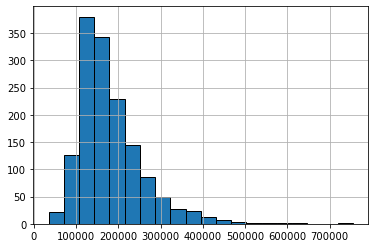

In [8]:
housing['SalePrice'].hist(edgecolor='black', bins=20)

In [9]:
print('Skewness: {:0.3f}'.format(housing['SalePrice'].skew()))
print('Kurtosis: {:0.3f}'.format(housing['SalePrice'].kurt()))

Skewness: 1.883
Kurtosis: 6.536


In [10]:
housing[numerical_vars].describe()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,6.099315,5.575342,1971.267808,1162.626712,346.992466,2.866438
std,79442.502883,9981.264932,1.382997,1.112799,30.202904,386.587738,436.528436,0.815778
min,34900.000000,1300.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000
25%,129975.000000,7553.500000,5.000000,5.000000,1954.000000,882.000000,0.000000,2.000000
50%,163000.000000,9478.500000,6.000000,5.000000,1973.000000,1087.000000,0.000000,3.000000
75%,214000.000000,11601.500000,7.000000,6.000000,2000.000000,1391.250000,728.000000,3.000000
max,755000.000000,215245.000000,10.000000,9.000000,2010.000000,4692.000000,2065.000000,8.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1C99C928>,
      dtype=object)

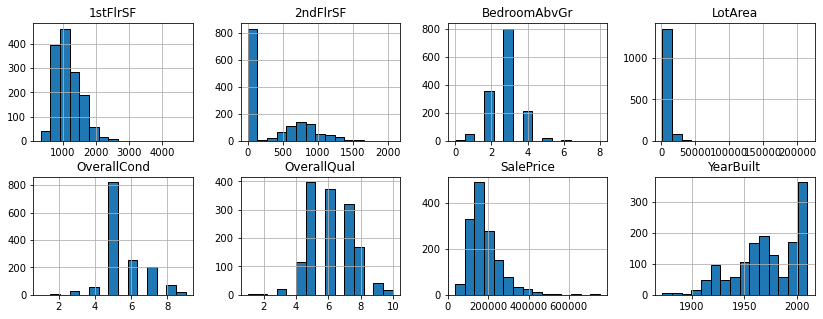

In [11]:
housing[numerical_vars].hist(edgecolor= 'black', bins=15, figsize=(14, 5), layout=(2, 4))

In [12]:
housing['Age']= housing['YrSold'] - housing['YearBuilt']
numerical_vars.remove('YearBuilt')
numerical_vars.append("Age")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1CD536D0>,
      dtype=object)

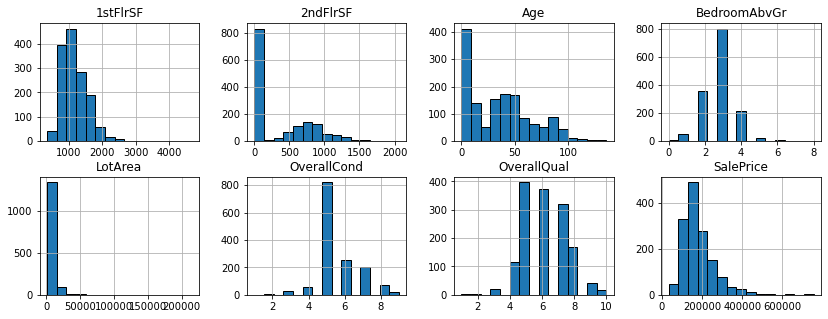

In [13]:
housing[numerical_vars].hist(edgecolor= 'black', bins=15, figsize=(14, 5), layout=(2, 4))

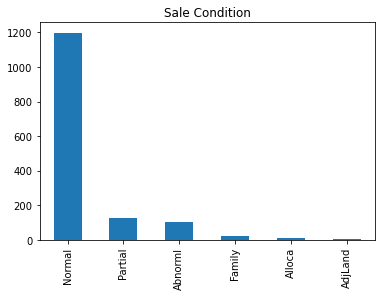

In [14]:
housing['SaleCondition'].value_counts().plot(kind='bar', title='Sale Condition')

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

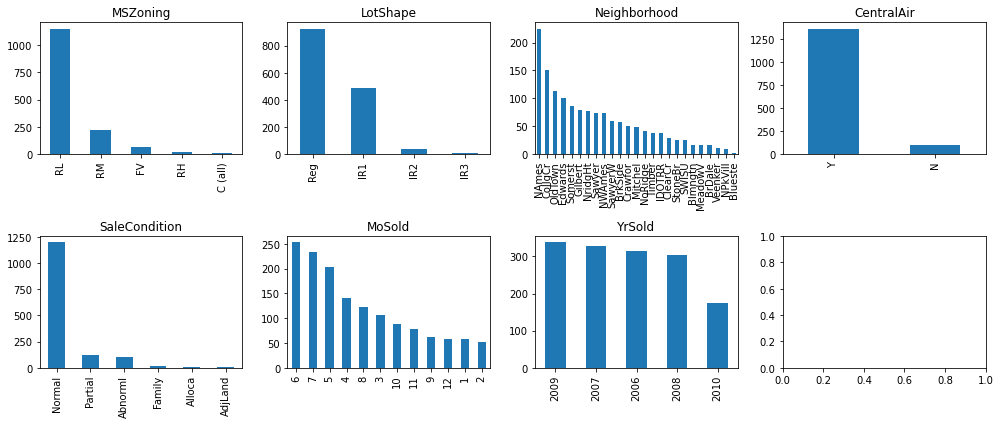

In [16]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    housing[var].value_counts().plot(kind='bar', ax=subplot, title=var)

fig.tight_layout()

In [17]:
def identify_cat_above30(series):
    counts = series.value_counts()
    return list(counts[counts>=30].index)

In [18]:
levels_to_keep = housing[categorical_vars].apply(identify_cat_above30, axis=0)
levels_to_keep

MSZoning                                              [RL, RM, FV]
LotShape                                           [Reg, IR1, IR2]
Neighborhood     [NAmes, CollgCr, OldTown, Edwards, Somerst, Gi...
CentralAir                                                  [Y, N]
SaleCondition                           [Normal, Partial, Abnorml]
MoSold                     [6, 7, 5, 4, 8, 3, 10, 11, 9, 12, 1, 2]
YrSold                              [2009, 2007, 2006, 2008, 2010]
dtype: object

In [19]:
for var in categorical_vars:
    housing = housing.loc[housing[var].isin(levels_to_keep[var])]

In [20]:
housing.shape

(1246, 16)

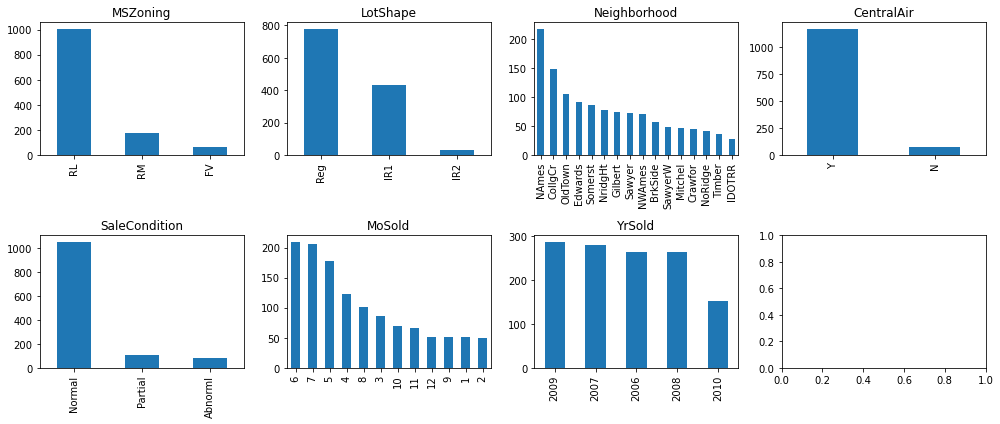

In [21]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for var, subplot in zip(categorical_vars, ax.flatten()):
    housing[var].value_counts().plot(kind='bar', ax=subplot, title=var)

fig.tight_layout()




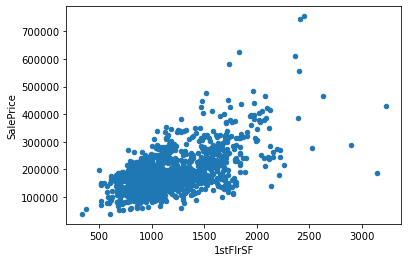

In [22]:
housing.plot.scatter(x='1stFlrSF', y='SalePrice')

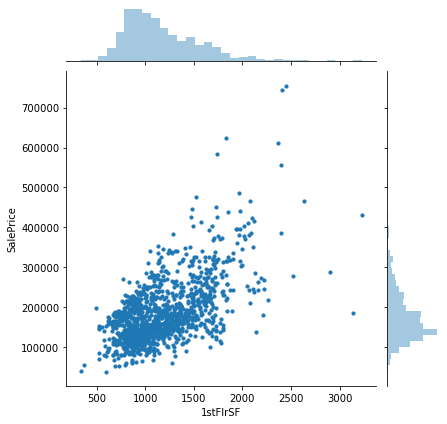

In [23]:
sns.jointplot(x='1stFlrSF', y='SalePrice', data=housing, joint_kws={'s': 10})

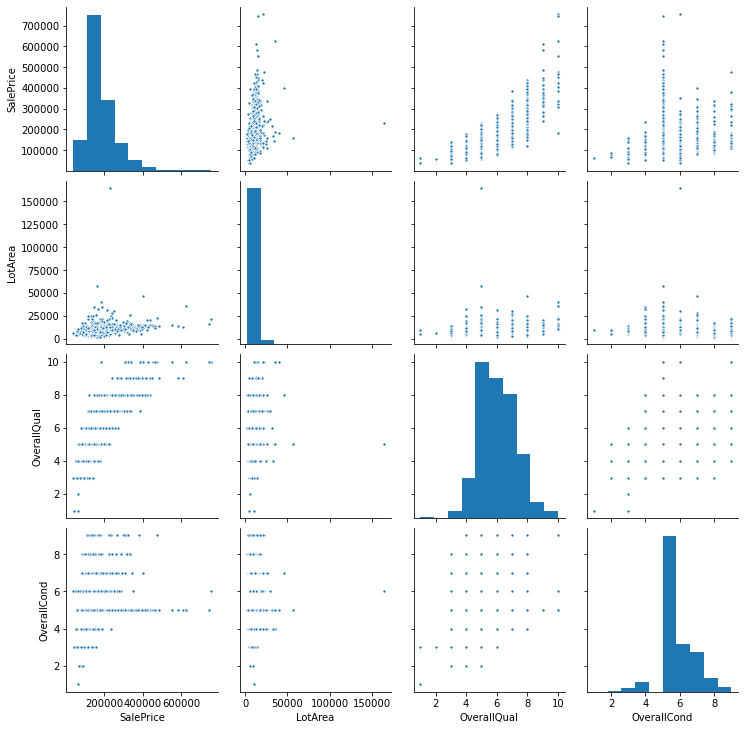

In [24]:
sns.pairplot(housing[numerical_vars[:4]], plot_kws={'s': 10})

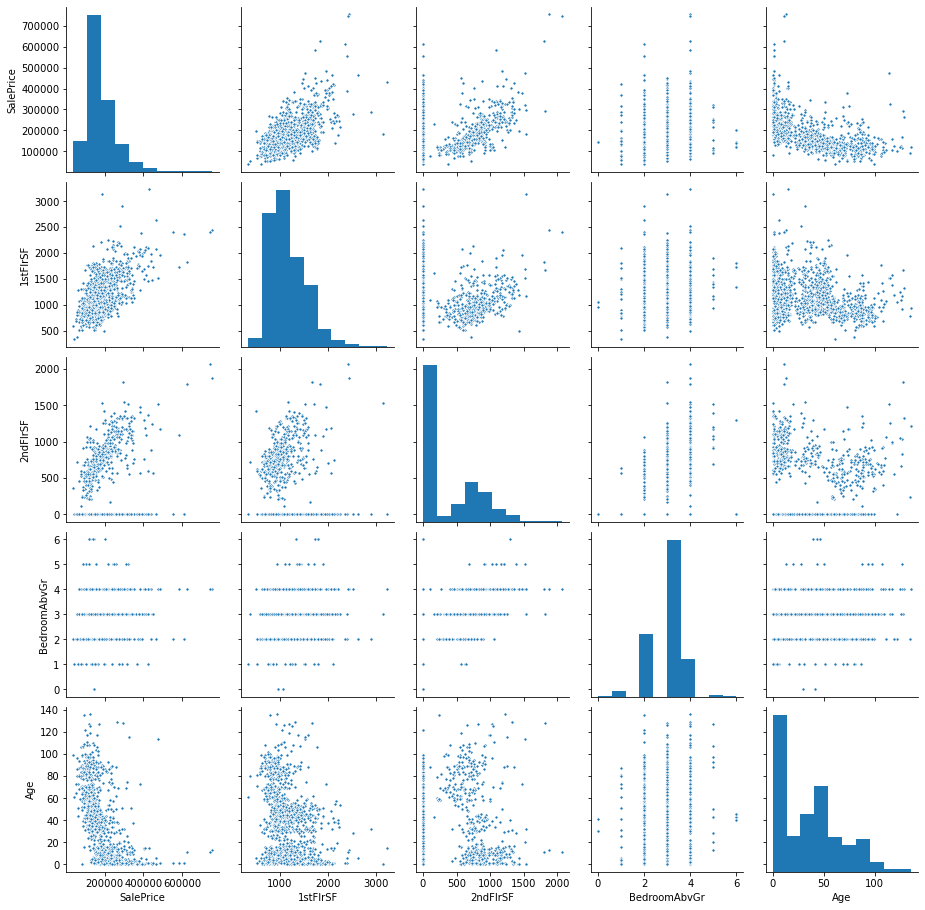

In [25]:
sns.pairplot(housing[['SalePrice']+numerical_vars[4:]], plot_kws={'s': 10})

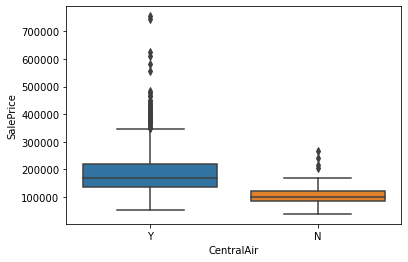

In [28]:
sns.boxplot(x='CentralAir', y='SalePrice', data=housing);

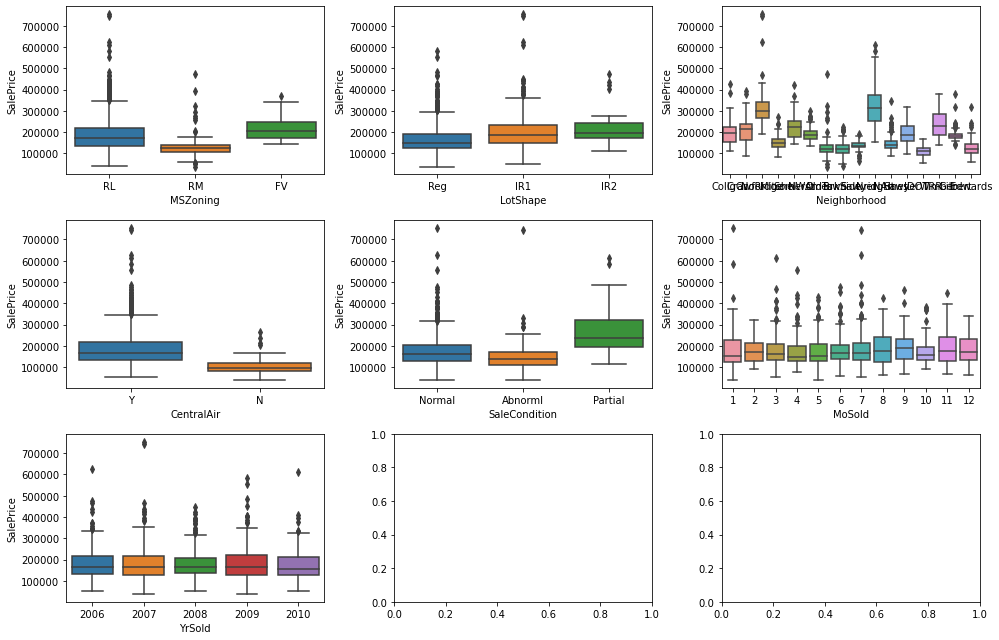

In [27]:
fig, ax = plt.subplots(3,3, figsize=(14,9))
for var, subplot in zip(categorical_vars, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=housing, ax=subplot)

fig.tight_layout()

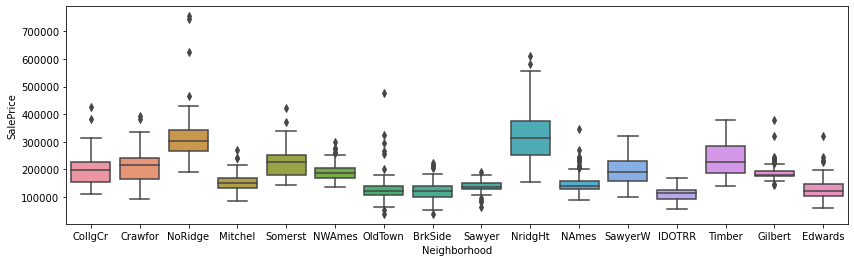

In [29]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='Neighborhood', y='SalePrice', data=housing, ax=ax);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

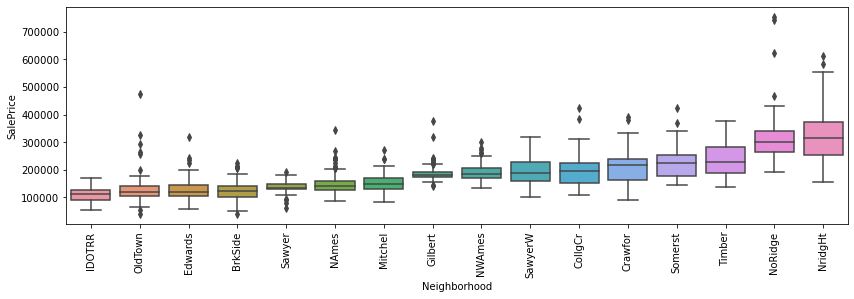

In [31]:
sorted_nb = housing.groupby('Neighborhood')['SalePrice'].median().sort_values().index.values

fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='Neighborhood', y='SalePrice', data=housing, order=sorted_nb, ax=ax);
plt.xticks(rotation='vertical')

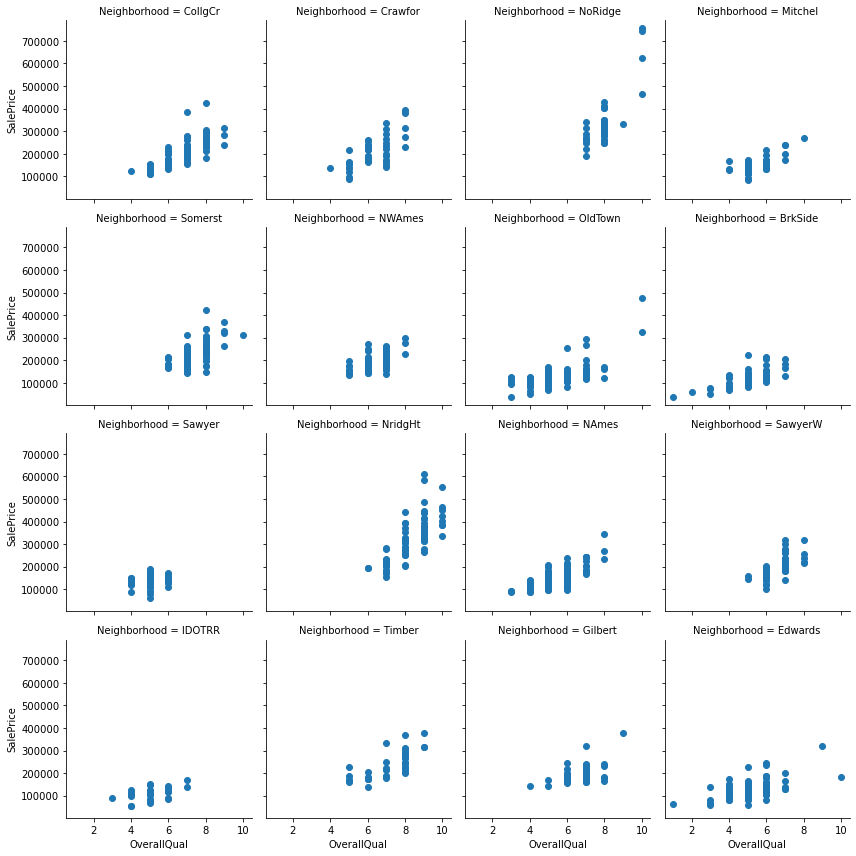

In [32]:
conditional_plot = sns.FacetGrid(housing, col="Neighborhood", col_wrap=4)
conditional_plot.map(plt.scatter, "OverallQual", "SalePrice");

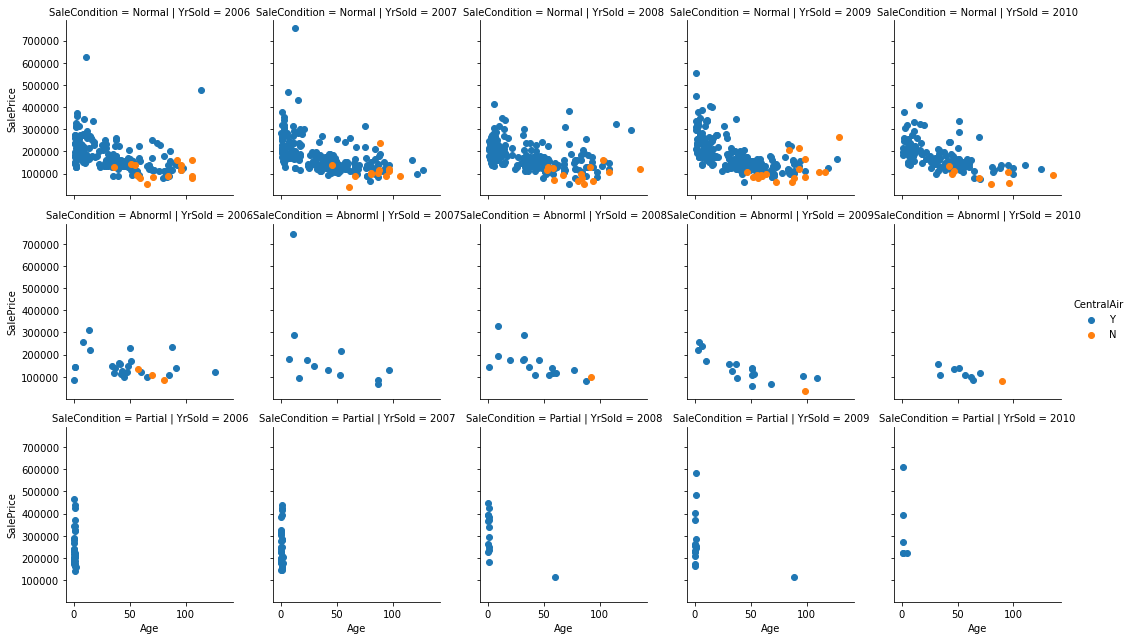

In [33]:
conditional_plot = sns.FacetGrid(housing, col="YrSold", row="SaleCondition", hue='CentralAir')
conditional_plot.map(plt.scatter, "Age", "SalePrice").add_legend();
